# Keras CNN cats vs Dogs image classification.

This project is an image classification project using a deep-learning based on Convolutional Neural Networks (CNNs) with Keras.  
The Dogs vs. Cats is a classic problem for anyone who wants to dive deeper into deep-learning.
You can find a link provided by microsoft to the dataset used in ths project [here](https://www.microsoft.com/en-us/download/details.aspx?id=54765) .




## Exploring Data

### Importing Libraries

 * The <u>**shutil**</u> library provides functions for file management tasks such as copying and deleting files.
 * The <u>**random**</u> library provides functions for generating random numbers and selecting random elements from a list.
 * The <u>**os**</u> library provides functions for interacting with the operating system, such as creating and deleting directories.
 * The <u>**time**</u> library provides functions for working with time and dates.
 * The <u>**Image**</u> module from the PIL library provides functions for working with image files.





In [212]:
 !pip install pillow matplotlib opencv-python tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [213]:
import shutil
import random 
import os
import time
from PIL import Image

### Writing some useful functions to manage our files and directories

We will start coding by writing certain functions that will help us explore and manage our dataset. These functions include : 


*   `reset_directory` : Deletes the contents of a directory.
*   `extract_corrupt_img_files`: Gets corrupted image files within a directory.
*   `copy_clean`: Copies all the files from the source directory to the destination directory, ignoring the files specified in the ignore list.
*   `train_test_validation_split`: Splits a dataset into three subsets: a training set, a validation set, and a test set.

*  `split_data_to_dir` : Copies samples (represented by a dict) from one source directory to a destination directory 
*   `display_imgs_from_path`: Displays a random sample of images from a directory.





In [214]:
def reset_directory(dir_path):
    """
    Deletes the contents of a directory and then recreates the directory.
    
    Arguments:
    dir_path (str): The path of the directory to reset.
    
    Returns:
    None
    """

    # If the directory is already empty, print a message and return

    if len(os.listdir(dir_path)) == 0 :
        print(dir_path + " is already empty")
        return

    # Print a message and record the starting time
    beg = time.time()
    print("resetting "+ dir_path)

    # Delete the directory and all its contents
    shutil.rmtree(dir_path)

    # Create an empty directory in the same location
    os.makedirs(dir_path)
    print(dir_path + " is now empty")
    print("timing : " + str(time.time() - beg))


In [215]:
def extract_corrupt_img_files(dir_path):
  """
  Gets corrupted image files within a directory
  
    Arguments:
        dir_path: a string representing the path for the target directory

    Returns:
        a list of the paths for the corrupted image files

  """ 
  i = 0
  beg = time.time()
  corrupted = []
  for filename in os.listdir(dir_path):
    i +=1
    if (i % 50 == 0):
      print(i, end =" ")
    if (i % 1000 == 0):
      print()
    try:
      img = Image.open(dir_path + '/' + filename)
    except:
      corrupted.append(filename)
      continue

  end = time.time()
  print()
  print('*' * 50) 
  print("\nTASK FINISHED IN " + str(end - beg) + " seconds ")
  print("{} corrupted files found in {}".format(len(corrupted), dir_path))
  print()
  print('*' * 50) 
  return corrupted

In [216]:
def copy_clean(src = '', dest ='', ignore = []):
    """
    Copies all the files from the source directory to the destination directory, ignoring the files specified in the ignore list.
    
    Parameters:
    src (str): The path of the source directory.
    dest (str): The path of the destination directory.
    ignore (list): A list of file names to ignore.
    
    Returns:
    None
    """
    beg = time.time()
    print("Copying file from " + src + " to " + dest)
    i = 0
    j = 0
    for filename in (os.listdir(src)):
        i += 1
        if filename not in ignore:
            shutil.copy(src + '/' + filename, dest + '/' + filename)
            j+=1
        if (i % 100 == 0):
            print(i, end = " ")
        if (i % 1000 == 0):
            print()
        
    end = time.time()
    print()
    print(j)
    print("Copying {} files finished in {} seconds ".format(len(os.listdir(dest)),int(end - beg)))

In [217]:
def train_test_validation_split(data_path = '',test_split = 0.15, validation_split = 0.15):

    """
    Splits a dataset into three subsets: a training set, a validation set, and a test set.
    
    Parameters:
    data_path (str): The path of the directory containing the dataset.
    test_split (float): The fraction of the dataset to include in the test set.
    validation_split (float): The fraction of the remaining dataset to include in the validation set.
    
    Returns:
    tuple: A tuple containing three lists of file names: the training set, the test set, and the validation set.
    """

    # Calculate the total number of files in the dataset
    data_size = len(os.listdir(data_path))

    # Calculate the number of files to include in the test and validation sets
    test_size = int(test_split * data_size)
    validation_size = int(validation_split * data_size)
    

    
    test_sample = []
    validation_sample = []
    train_sample = []
    
    # Select a random sample of files for the test set
    test_sample = random.sample(os.listdir(data_path),test_size )
    
    # Calculate the remaining files that are not in the test set
    train_data = set(os.listdir(data_path)) - set(test_sample)
    train_data = list(train_data)
    
    # Select a random sample of files from the remaining files for the validation set
    validation_sample = random.sample(train_data,validation_size )
    
    # Calculate the remaining files that are not in the validation set
    train_sample = set(train_data) - set(validation_sample)
    train_sample = list(train_sample)
    
    # Print the sizes of the train, test, and validation sets
    print('train size ' + str(len(train_sample)))
    print('test size ' + str(len(test_sample)))
    print('validation size ' + str(len(validation_sample)))
    
    return train_sample, test_sample , validation_sample

    

In [218]:
def split_data_to_dir(class_str = '',src_path ='', dest_path ='',samples ={}):
  """
  Copies samples (represented by a dict) from one source directory to a destination directory 
  
    Arguments:
        class_str: a string representing the class
        src_path: a string representing the path for the source directory
        dest_path: a string representing the path for the destination directory
        sample: a python Dict representing either test or train or validation samples 

    Returns:
        None

  """

  src_path = src_path + '/' + class_str
  dest_path = dest_path + '/' + class_str
  beg = time.time()
  print(" Sending test samples to  " + dest_path)
  i = 0 # to track haw many imgs are copied
  for filename in samples[class_str]:
    shutil.copy(src_path + '/' + filename, dest_path + '/'+ class_str + "_" + filename)
    i+=1
    if (i % 25 == 0 ):
      print(i, end = " ")
    if (i % 500 == 0):
      print()

  endt = time.time()
  print("nb of test samples for {} is {}".format(class_str, str(i)))
  print("Sending {} test samples complete in {} seconds ".format(str(i),str(endt - beg)))

In [219]:
import matplotlib.pyplot as plt
from cv2 import imread

def display_imgs_from_path(path='', rows = 1, cols = 1):
  """
  Displays random rows * cols images from a directory
    
  Arguments:
      path: a string representing the path for the directory with the images to displat 
      rows: an integer representing the number of rows in the plots figure
      cols: an integer representing the number of columns in the plots figure

  Returns:
      None

  """
  fig = plt.figure(figsize=(8, 5))

  for i , img_name in enumerate(random.sample(os.listdir(path), rows * cols)):
    img = imread(path + '/' + img_name)
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name[:8])
    




### Exploring the dataset

Getting the size of the data in each class

In [220]:
MYPATH = "/home/ntn-dev/Project/Phoenix/deep-learning"

In [221]:
print("Cat samples : {}".format(len(os.listdir(MYPATH + "/kagglecatsanddogs_5340/PetImages/Dog"))))
print("Dog samples : {}".format(len(os.listdir(MYPATH + "/kagglecatsanddogs_5340/PetImages/Cat"))))

Cat samples : 12501
Dog samples : 12501


Looking for potential corrupt files : found 2 in for each class

In [222]:
dog_path = MYPATH + "/kagglecatsanddogs_5340/PetImages/Dog"
cat_path = MYPATH + "/kagglecatsanddogs_5340/PetImages/Cat"

corrupted_dog_imgs = extract_corrupt_img_files(dog_path)
corrupted_cat_imgs = extract_corrupt_img_files(cat_path)


50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 
1050 

1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 
2050 2100 2150 2200 2250 

/home/ntn-dev/.pyenv/versions/metric/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 
3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 
4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 
5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550 5600 5650 5700 5750 5800 5850 5900 5950 6000 
6050 6100 6150 6200 6250 6300 6350 6400 6450 6500 6550 6600 6650 6700 6750 6800 6850 6900 6950 7000 
7050 7100 7150 7200 7250 7300 7350 7400 7450 7500 7550 7600 7650 7700 7750 7800 7850 7900 7950 8000 
8050 8100 8150 8200 8250 8300 8350 8400 8450 8500 8550 8600 8650 8700 8750 8800 8850 8900 8950 9000 
9050 9100 9150 9200 9250 9300 9350 9400 9450 9500 9550 9600 9650 9700 9750 9800 9850 9900 9950 10000 
10050 10100 10150 10200 10250 10300 10350 10400 10450 10500 10550 10600 10650 10700 10750 10800 10850 10900 10950 11000 
11050 11100 11150 11200 11250 11300 11350 11400 11450 11500 11550 11600 11650 11700 11750 11800

In [223]:
print(corrupted_dog_imgs)
print(corrupted_cat_imgs)

['Thumbs.db', '11702.jpg']
['Thumbs.db', '666.jpg']


Creating train, test and validation directories for each class.

In [224]:
"""
os.makedirs('/kaggle/working/Data/train')
os.makedirs('/kaggle/working/Data/test')
"""
try:
    os.makedirs(MYPATH + '/Dataset/Cat')
    os.makedirs(MYPATH + '/Dataset/Dog')

    os.makedirs(MYPATH + '/train/Cat')
    os.makedirs(MYPATH + '/test/Cat')

    os.makedirs(MYPATH + '/train/Dog')
    os.makedirs(MYPATH + '/test/Dog')

    os.makedirs(MYPATH + '/validation/Dog')
    os.makedirs(MYPATH + '/validation/Cat')
except FileExistsError :
    print("files already exists")
    pass

files already exists


Creating directories for the uncorrupted data

In [225]:
#os.makedirs('/kaggle/working/Dataset/Cat')
#os.makedirs('/kaggle/working/Dataset/Dog')

In [226]:
original_dataset_path = MYPATH + '/kagglecatsanddogs_5340/PetImages'
clean_dataset_path = MYPATH + '/Dataset'
test_path = MYPATH + '/test'
train_path = MYPATH + '/train'
validation_path = MYPATH + '/validation'


In [227]:
reset_directory(clean_dataset_path + '/Cat')


resetting /home/ntn-dev/Project/Phoenix/deep-learning/Dataset/Cat
/home/ntn-dev/Project/Phoenix/deep-learning/Dataset/Cat is now empty
timing : 0.14444327354431152


Copying clean (i.e uncorrupted) data to their respective directories.

In [228]:
reset_directory(clean_dataset_path +'/Cat')

copy_clean(src = original_dataset_path + '/Cat',
           dest = clean_dataset_path +'/Cat',
           ignore = corrupted_cat_imgs)
print(len(os.listdir(clean_dataset_path +'/Cat')))

/home/ntn-dev/Project/Phoenix/deep-learning/Dataset/Cat is already empty
Copying file from /home/ntn-dev/Project/Phoenix/deep-learning/kagglecatsanddogs_5340/PetImages/Cat to /home/ntn-dev/Project/Phoenix/deep-learning/Dataset/Cat
100 200 

300 400 500 600 700 800 900 1000 
1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 
2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 
3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 
4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 
5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 
6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 
7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 
9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 
10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 
11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 
12100 12200 12300 12400 12500 
12499
Copying 12499 files finished in 1 seconds 
12499


In [229]:
reset_directory(clean_dataset_path +'/Dog')

copy_clean(src = original_dataset_path + '/Dog',
           dest = clean_dataset_path +'/Dog',
           ignore = corrupted_dog_imgs)
print(len(os.listdir(clean_dataset_path +'/Dog')))

resetting /home/ntn-dev/Project/Phoenix/deep-learning/Dataset/Dog


/home/ntn-dev/Project/Phoenix/deep-learning/Dataset/Dog is now empty
timing : 0.1421964168548584
Copying file from /home/ntn-dev/Project/Phoenix/deep-learning/kagglecatsanddogs_5340/PetImages/Dog to /home/ntn-dev/Project/Phoenix/deep-learning/Dataset/Dog
100 200 300 400 500 600 700 800 900 1000 
1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 
2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 
3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 
4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 
5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 
6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 
7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 
8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 
9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 
10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 
11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 
12100 12200 12300 12400 12500 
12499
Copying 12499 files finished in 3 seconds 
12499


Splitting Data into train, validation and test sets

In [230]:
cat_train_sample, cat_test_sample , cat_validation_sample = train_test_validation_split(data_path = clean_dataset_path +'/Cat')

train size 8751
test size 1874
validation size 1874


In [231]:
dog_train_sample, dog_test_sample , dog_validation_sample = train_test_validation_split(data_path = clean_dataset_path +'/Dog')

train size 8751
test size 1874
validation size 1874


In [232]:
test_samples = { 'Cat': cat_test_sample,
                 'Dog': dog_test_sample,
                }

validation_samples = { 'Cat': cat_validation_sample,
                       'Dog': dog_validation_sample,
                      }
train_samples = { 'Cat': cat_train_sample,
                  'Dog': dog_train_sample,
                      }

In [233]:
clean_dataset_path = MYPATH + '/Dataset'
test_path = MYPATH + '/test'
train_path = MYPATH + '/train'
validation_path = MYPATH + '/validation'

Sending train, validation and test sets to their respective directories.

In [234]:
reset_directory(test_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = test_path, samples = test_samples)
print(len(os.listdir(test_path +"/Cat")))

resetting /home/ntn-dev/Project/Phoenix/deep-learning/test/Cat
/home/ntn-dev/Project/Phoenix/deep-learning/test/Cat is now empty
timing : 0.020733356475830078
 Sending test samples to  /home/ntn-dev/Project/Phoenix/deep-learning/test/Cat
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Cat is 1874
Sending 1874 test samples complete in 0.2856135368347168 seconds 
1874


In [235]:
reset_directory(train_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = train_path, samples = train_samples)
print(len(os.listdir(train_path +"/Cat")))

resetting /home/ntn-dev/Project/Phoenix/deep-learning/train/Cat
/home/ntn-dev/Project/Phoenix/deep-learning/train/Cat is now empty
timing : 0.09617161750793457
 Sending test samples to  /home/ntn-dev/Project/Phoenix/deep-learning/train/Cat
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 
2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500 
2525 2550 2575 2600 2625 2650 2675 2700 2725 2750 2775 2800 2825 2850 2875 2900 2925 2950 2975 3000 
3025 3050 3075 3100 3125 3150 3175 3200 3225 3250 3275 3300 3325 3350 3375 3400 3425 3450 3475 3500 
3525 3550 3575 3600 3625 3650 3675 3700 3725 3750 3775 3800 3825 3850 3875 3900 3925 3950 3975 

In [236]:
reset_directory(validation_path +"/Cat")
split_data_to_dir(class_str = "Cat", src_path = clean_dataset_path, dest_path = validation_path, samples = validation_samples)
print(len(os.listdir(validation_path  +"/Cat")))

resetting /home/ntn-dev/Project/Phoenix/deep-learning/validation/Cat
/home/ntn-dev/Project/Phoenix/deep-learning/validation/Cat is now empty
timing : 0.020621538162231445
 Sending test samples to  /home/ntn-dev/Project/Phoenix/deep-learning/validation/Cat
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Cat is 1874
Sending 1874 test samples complete in 0.27692604064941406 seconds 
1874


In [237]:
reset_directory(test_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = test_path, samples = test_samples)
print(len(os.listdir(test_path +"/Dog")))

resetting /home/ntn-dev/Project/Phoenix/deep-learning/test/Dog
/home/ntn-dev/Project/Phoenix/deep-learning/test/Dog is now empty
timing : 0.025693416595458984
 Sending test samples to  /home/ntn-dev/Project/Phoenix/deep-learning/test/Dog
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Dog is 1874
Sending 1874 test samples complete in 0.3425121307373047 seconds 
1874


In [238]:
reset_directory(train_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = train_path, samples = train_samples)
print(len(os.listdir(train_path +"/Dog")))

resetting /home/ntn-dev/Project/Phoenix/deep-learning/train/Dog
/home/ntn-dev/Project/Phoenix/deep-learning/train/Dog is now empty
timing : 0.10031509399414062
 Sending test samples to  /home/ntn-dev/Project/Phoenix/deep-learning/train/Dog
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 1875 1900 1925 1950 1975 2000 
2025 2050 2075 2100 2125 2150 2175 2200 2225 2250 2275 2300 2325 2350 2375 2400 2425 2450 2475 2500 
2525 2550 2575 2600 2625 2650 2675 2700 2725 2750 2775 2800 2825 2850 2875 2900 2925 2950 2975 3000 
3025 3050 3075 3100 3125 3150 3175 3200 3225 3250 3275 3300 3325 3350 3375 3400 3425 3450 3475 3500 
3525 3550 3575 3600 3625 3650 3675 3700 3725 3750 3775 3800 3825 3850 3875 3900 3925 3950 3975 

In [239]:
reset_directory(validation_path +"/Dog")
split_data_to_dir(class_str = "Dog", src_path = clean_dataset_path, dest_path = validation_path, samples = validation_samples)
print(len(os.listdir(validation_path  +"/Dog")))

resetting /home/ntn-dev/Project/Phoenix/deep-learning/validation/Dog
/home/ntn-dev/Project/Phoenix/deep-learning/validation/Dog is now empty
timing : 0.02391648292541504
 Sending test samples to  /home/ntn-dev/Project/Phoenix/deep-learning/validation/Dog
25 50 75 100 125 150 175 200 225 250 275 300 325 350 375 400 425 450 475 500 
525 550 575 600 625 650 675 700 725 750 775 800 825 850 875 900 925 950 975 1000 
1025 1050 1075 1100 1125 1150 1175 1200 1225 1250 1275 1300 1325 1350 1375 1400 1425 1450 1475 1500 
1525 1550 1575 1600 1625 1650 1675 1700 1725 1750 1775 1800 1825 1850 nb of test samples for Dog is 1874
Sending 1874 test samples complete in 0.5209400653839111 seconds 
1874


Quick checking the sets sizes.

In [240]:
print("Folders in test " + str(len(os.listdir(test_path))))
print("Samples in test/Cat: " + str(len(os.listdir(test_path + "/Cat"))))
print("Samples in test/Dog: " + str(len(os.listdir(test_path + "/Dog"))))

print("Folders in validation " + str(len(os.listdir(validation_path))))
print("Samples in validation/Cat: " + str(len(os.listdir(validation_path + "/Cat"))))
print("Samples in validation/Dog: " + str(len(os.listdir(validation_path + "/Dog"))))

print("Folders in train " + str(len(os.listdir(train_path))))
print("Samples in train/Cat: " + str(len(os.listdir(train_path + "/Cat"))))
print("Samples in train/Dog: " + str(len(os.listdir(train_path + "/Dog"))))

Folders in test 2
Samples in test/Cat: 1874
Samples in test/Dog: 1874
Folders in validation 2
Samples in validation/Cat: 1874
Samples in validation/Dog: 1874
Folders in train 2
Samples in train/Cat: 8751
Samples in train/Dog: 8751


Taking a look at random samples of data for each class in the train, validation and test sets.

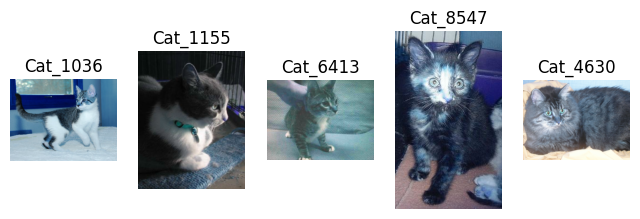

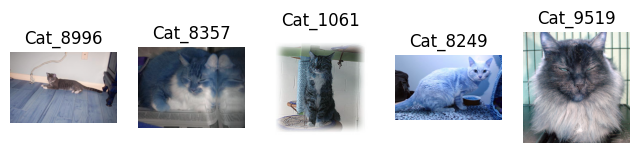

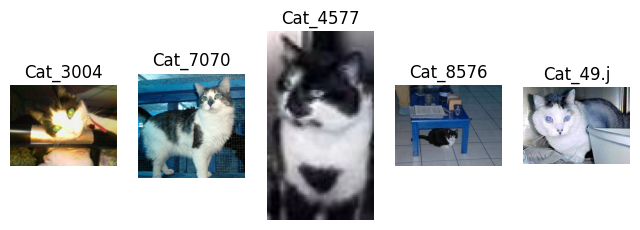

In [241]:
display_imgs_from_path(path=test_path +'/Cat', rows = 1, cols = 5)
display_imgs_from_path(path=train_path +'/Cat', rows = 1, cols = 5)
display_imgs_from_path(path=validation_path +'/Cat', rows = 1, cols = 5)


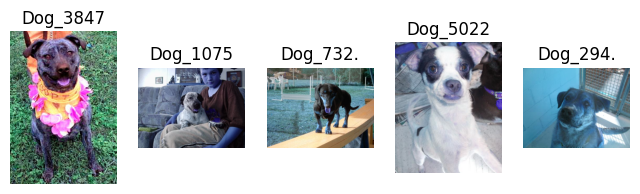

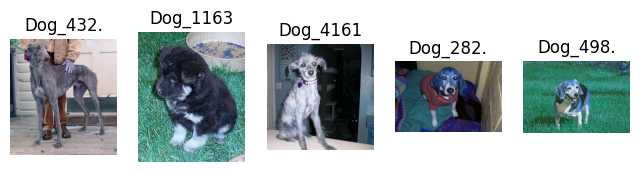

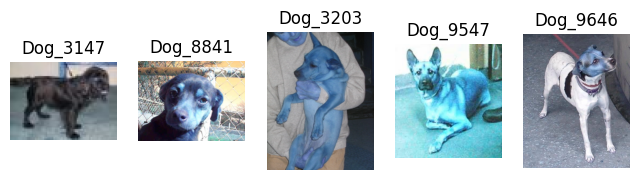

In [242]:
display_imgs_from_path(path=test_path +'/Dog', rows = 1, cols = 5)
display_imgs_from_path(path=train_path +'/Dog', rows = 1, cols = 5)
display_imgs_from_path(path=validation_path +'/Dog', rows = 1, cols = 5)

## Data augmentation
In this code snippet, three instances of the `ImageDataGenerator` class are created: `validation_datagen`, `test_datagen`, and `train_datagen`. These objects can be used to generate batches of image data for use in training, validation, and testing a deep learning model.

The `ImageDataGenerator` class is a convenience class that can be used to preprocess images and generate batches of image data for use in training a model. It has several optional parameters that allow you to customize the way the image data is generated.

These parameters allow the `train_datagen` object to randomly augment the training data by applying various transformations to the images, such as rotation, shearing, zooming, and horizontal flipping. This can be useful for increasing the robustness of the model and preventing overfitting.

The `WIDTH`, `HEIGHT`, and `IMG_SIZE` variables define the dimensions of the images that will be processed by the ImageDataGenerator objects. The `BATCH` variable specifies the number of images.



In [243]:
# Import the ImageDataGenerator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the image dimensions and Batch size
WIDTH = 128
HEIGHT = 128
IMG_SIZE = (WIDTH , HEIGHT)
BATCH = 32

# Create an ImageDataGenerator object for the validation set
validation_datagen = ImageDataGenerator(rescale=1. / 255)
# Create an ImageDataGenerator object for the test set
test_datagen = ImageDataGenerator(rescale=1. / 255)
# Create an ImageDataGenerator object for the training set

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)



In this code snippet, a `train_generator` object is created using the `flow_from_directory` method of the `train_datagen` object. The `flow_from_directory` method generates batches of image data from a directory of images, and allows to specify the dimensions of the images, the classes (or labels) of the images, and other parameters that control how the data is generated.

The train generator has found 17502 images belonging to 2 classes.

In [244]:
train_generator = train_datagen.flow_from_directory(train_path, 
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    #save_to_dir=aug_data_path,
                                                    #save_prefix='aug_',
                                                    #save_format="jpg",
                                                    seed = 1
                                                    
                                                    )
print(train_generator.class_indices)
print(train_generator.num_classes)
print(train_generator.samples)

Found 17502 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}
2
17502


In [245]:
validation_generator = validation_datagen.flow_from_directory(validation_path, 
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    seed = 1 )
print(validation_generator.class_indices)

Found 3748 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}


In [246]:
test_generator = test_datagen.flow_from_directory(test_path, 
                                                    target_size = IMG_SIZE,
                                                    classes=['Cat' , 'Dog'],
                                                    class_mode='binary',
                                                    batch_size=BATCH,
                                                    seed = 1 )
print(test_generator.class_indices)

Found 3748 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}


## Building the model

In the code snippet below , We build and compile our model. 
A convolutional neural network (CNN) is defined using the `Sequential` model from the tensorflow.keras.models module. The CNN consists of a series of 3 convolutional and pooling layers, followed by a fully-connected (dense) layer.

The `compile` method specifies the loss function, optimization algorithm, and metrics to use when training the model.

Finally our model has 12,942,273 total params.

`EarlyStopping`, `ModelCheckpoint`, `ReduceLROnPlateau` and `CSVLogger` are callbacks that will be further explained in the next snippet

In [247]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau , CSVLogger

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(WIDTH, HEIGHT, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 61, 61, 64)       

In the code snippet below, several callback functions are defined to be used during training of the CNN model.

* The `ReduceLROnPlateau` callback is used to reduce the learning rate of the optimizer when the validation accuracy stops improving.

* The `EarlyStopping` callback is used to stop training when the validation loss stops improving, using the `patience` parameter to specify the number of epochs to wait before stopping training.

* The `ModelCheckpoint` callback is used to save the model weights at the end of each epoch if the validation loss or accuracy improves.

* The `CSVLogger` callback is used to log the training and validation metrics to a CSV file.

The callbacks list is then created to store the defined callback objects. This list will be passed as an argument to the `fit` method of the model object when training the model, to specify which callback functions to use.

## Callbacks

In [248]:
models_path = MYPATH + '/Models'
os.makedirs(models_path)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience= 4, 
                                            verbose= 1, 
                                            factor= 0.75, 
                                            min_lr= 0.00001)

early_stopping = EarlyStopping(patience = 10)

"""checkpoint_loss = ModelCheckpoint(filepath = models_path + '/model_best_loss.hdf5',
    monitor = "val_loss",
    save_best_only = True, save_freq= 'epoch' )"""

checkpoint_acc = ModelCheckpoint(filepath = models_path + '/model_best_acc.hdf5',
    monitor = "val_accuracy",
    save_best_only = True, save_freq= 'epoch' )

filename='log.csv'
history_logger= CSVLogger(filename, separator=",", append=True)


callbacks = [learning_rate_reduction, early_stopping , #checkpoint_loss , 
             checkpoint_acc, history_logger]

 ## Training the model

In the code snippet below , the CNN model is trained using the `fit` method of the model object.
The `fit` method returns a `History` object, which contains the training and validation metrics for each epoch. The model object is then saved to disk using the `save_weights` and `save` methods, which save the model weights and architecture, respectively, to the specified file paths.

The training time is also calculated and printed to the console.

In [249]:
EPOCHS = 60
beg = int(time.time())

history = model.fit(
        train_generator,
        steps_per_epoch = train_generator.samples  // BATCH,
        epochs = EPOCHS,
        validation_data = validation_generator,
        validation_steps = validation_generator.samples // BATCH,
        callbacks = callbacks)

end = int(time.time())
t = end - beg
hrs = t // 3600
mins = (t - 3600 * hrs) // 60
secs = t % 60
print("training took {} hrs -- {} mins -- {} secs".format(hrs,mins,secs))
model.save_weights(models_path + '/first_try_weights.h5')
model.save(models_path + '/first_try.h5')


NameError: name 'scipy' is not defined

## Model performance and output

We now use the `evaluate` method of the `model` object to evaluate the model on the test data. The `evaluate` method takes as input the test data generator and returns a list of scores, where the first element is the loss and the second element is the accuracy. The loss and accuracy are calculated using the loss function and metrics specified when the model was compiled.

In this case, our model has an accuracy of **94.82 %**

In [ ]:
scores = model.evaluate(test_generator)

118/118 [==============================] - 11s 95ms/step - loss: 0.1276 - accuracy: 0.9482


The `history` object contains the training and validation metrics for each epoch, stored in the `history` attribute as a dictionary. The `accuracy` and `val_accuracy`, `loss` and `val_loss`  keys of this dictionary contain the training and validation accuracy and loss respectively.

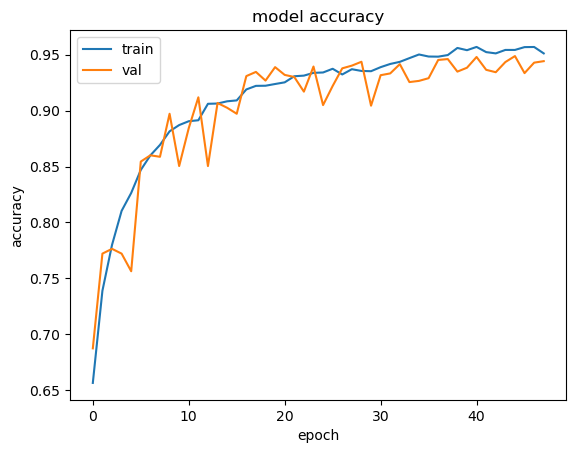

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

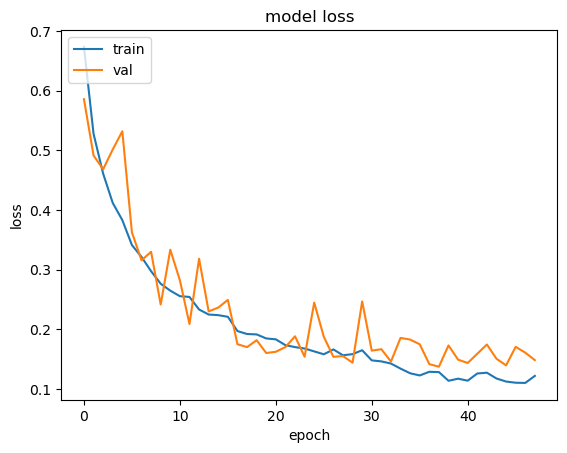

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

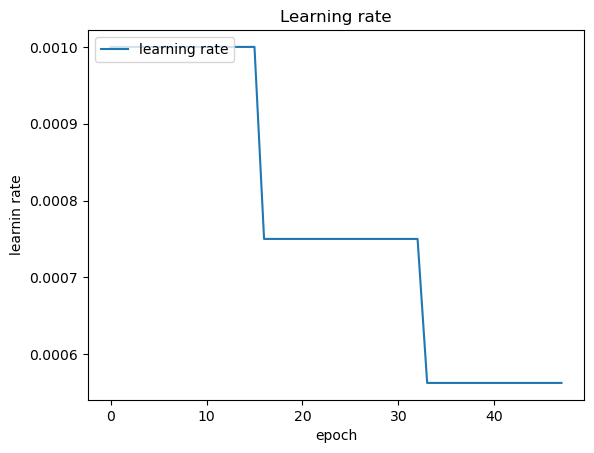

In [ ]:
plt.plot(history.history['lr'])
plt.title('Learning rate')
plt.ylabel('learnin rate')
plt.xlabel('epoch')
plt.legend(['learning rate'], loc='upper left')
plt.show()


### Visualizing results

In [ ]:
labels = ["Cat","Dog"]

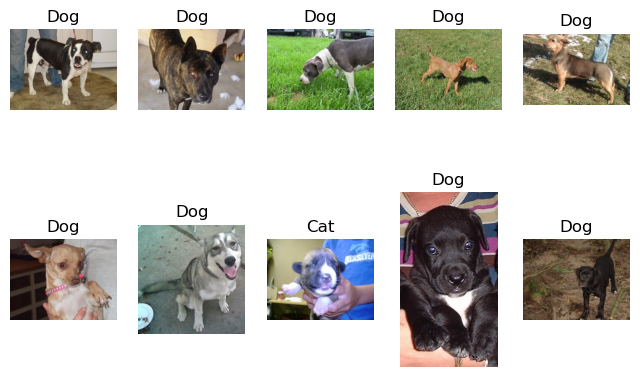

In [ ]:
fig = plt.figure(figsize=(8, 5))

    
for j in range(10):
    i = random.randint(0,1800)
    dog_test_img = cv2.imread(test_path + '/Dog'+'/'+
                              os.listdir(test_path + '/Dog')[i])
    #print(os.listdir(test_path + '/Dog')[5])
    #print(type(dog_test_img))
    #print(dog_test_img.shape)
    dog_test_img = cv2.cvtColor(dog_test_img,cv2.COLOR_BGR2RGB)
    fig.add_subplot(2, 5, j+1)
    plt.imshow(dog_test_img)
    plt.axis('off')
    
    dog_test_img = cv2.resize(dog_test_img,(128,128))
    dog_test_img = np.reshape(dog_test_img,(1,128,128,3))
    #print(dog_test_img.shape)
    
    results = model.predict(dog_test_img,verbose = 0)
    results = np.squeeze(results)
    plt.title(labels[results.astype(int)])

    #print(results.astype(int))
    #print(type(results))

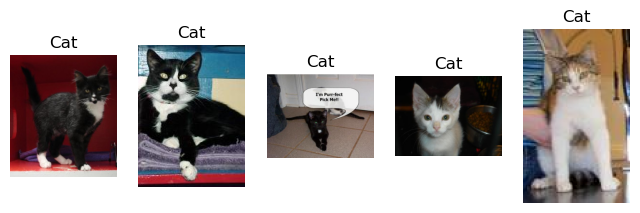

In [ ]:
fig = plt.figure(figsize=(8, 5))

    
for j in range(5):
    i = random.randint(0,1000)
    cat_test_img = cv2.imread(train_path + '/Cat'+'/'+
                              os.listdir(train_path + '/Cat')[i])
    #print(os.listdir(test_path + '/Dog')[5])
    #print(type(dog_test_img))
    #print(dog_test_img.shape)
    cat_test_img = cv2.cvtColor(cat_test_img,cv2.COLOR_BGR2RGB)
    fig.add_subplot(1, 5, j+1)
    plt.imshow(cat_test_img)
    plt.axis('off')
    
    cat_test_img = cv2.resize(cat_test_img,(128,128))
    cat_test_img = np.reshape(cat_test_img,(1,128,128,3))
    #print(dog_test_img.shape)
    
    results = model.predict(cat_test_img,verbose = 0)
    results = np.squeeze(results)
    label_idx = np.round(results,1).astype(int)
    plt.title(labels[label_idx])

    #print(results.astype(int))
    #print(type(results))

In [ ]:
from sklearn.metrics import confusion_matrix
for step in range( test_generator.samples // 32):
    (x, y) = next(test_generator)
    print(y)
    print(y.shape)
    print(type(y))
    y = y.astype(int)
    print(y)

    #Predict
    y_prediction = model.predict(x)
    print(y_prediction)
    y_prediction = np.round(y_prediction,1).astype(int)
    print(y_prediction.shape)
    y_prediction = np.reshape(y_prediction,y.shape)
    print(y_prediction)


[1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1.]
(32,)
<class 'numpy.ndarray'>
[1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1]
1/1 [==============================] - 0s 246ms/step
[[5.9625530e-01]
 [1.5924893e-03]
 [9.9999905e-01]
 [5.4081697e-02]
 [9.9930310e-01]
 [6.1430415e-05]
 [9.9841326e-01]
 [9.2075250e-05]
 [4.5478452e-02]
 [9.8733836e-01]
 [9.5614594e-01]
 [9.9681401e-01]
 [3.0506588e-09]
 [9.8794460e-01]
 [5.3726579e-10]
 [1.7498685e-06]
 [9.9999940e-01]
 [9.9999869e-01]
 [1.7349288e-05]
 [9.3332976e-01]
 [9.8638957e-05]
 [9.9678749e-01]
 [4.7114081e-05]
 [9.5591776e-04]
 [1.0365698e-06]
 [3.8102074e-03]
 [9.9998111e-01]
 [9.9112469e-01]
 [9.4979648e-03]
 [1.1871574e-03]
 [9.5787337e-03]
 [9.9839503e-01]]
(32, 1)
[0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
ys = []
y_predictions = []

for step in range( test_generator.samples // 32):
    (x, y) = next(test_generator)
    y = y.astype(int)
    ys = ys + list(y)

    #Predict
    y_prediction = model.predict(x)
    #print(y_prediction)
    y_prediction = np.round(y_prediction,1).astype(int)
    #print(y_prediction.shape)
    y_prediction = np.reshape(y_prediction,y.shape)
    y_predictions  = y_predictions + list(y_prediction)
    #print(y_prediction)


1/1 [==============================] - 0s 236ms/step


In [ ]:
#Create confusion matrix and normalizes it over predicted (columns)
cm = confusion_matrix(ys, y_predictions , normalize='pred')
print(cm)

[[0.87652582 0.00185874]
 [0.12347418 0.99814126]]


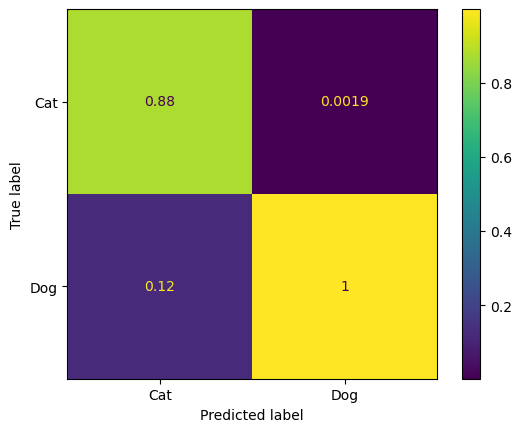

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
plt.show()

## Conclusion 

Our models has a final test accuracy of 94.82 % despite having a rather simple CNN model architecture.
Additionally, our model has avoided overfitting, which was evident in the preceding plots.This was largely due to the use of early stopping and some regularization techniques we employed such as dropout and batch normalization.

Not bad for a first try! This example clearly demostrates the power of CNN models for image classification tasks.
However there is plenty of room for improvement, such as fine-tuning our model's hyperparameters. We can also resort to fine-tuning a pre-trained model, which can often lead to better performance than training a model from scratch.